In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
import os
from sys import platform

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%config Inlinebackend.figure_format = 'retina'
%matplotlib inline
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")
import pandas as pd

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
38095,38095,1.5,Premium,F,SI2,63.0,59.0,7.24,7.2,4.55,9.016


In [5]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
12414,12414,2.25,Very Good,H,SI2,61.2,63.0,8.49,8.38,5.16


In [6]:
df_train.shape

(40455, 11)

In [7]:
df_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [8]:
df = df_train[['id', 'depth', 'table', 'x', 'y','z', 'price']]

<Axes: >

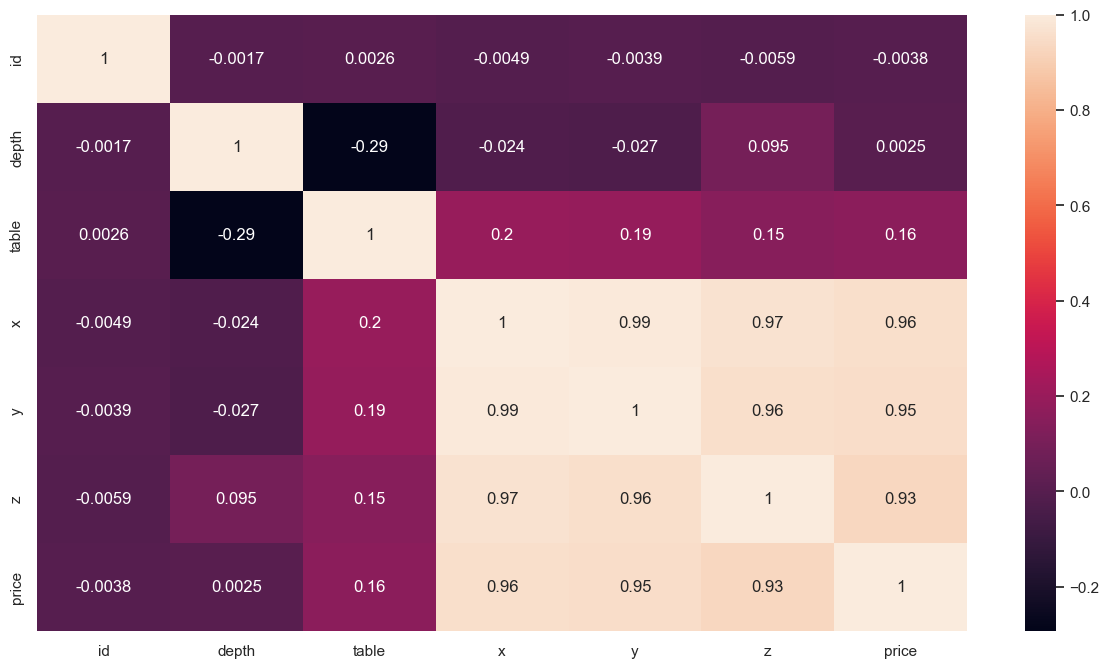

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [26]:
df_train_modified = df_train

In [27]:
cut_dict = {'Very Good': 5, 'Good': 4, 'Premium': 3, 'Ideal': 2, 'Fair': 1}
df_train_modified['categorized_cut'] = df_train_modified['cut'].map(cut_dict)
df_train_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,4,7,4,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,5,3,6,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,3,3,7,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,2,6,5,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,2,4,6,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,4,3,5,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,2,6,4,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,3,7,2,6.385


In [28]:
df_train_modified['color'].unique()

array(['D', 'H', 'E', 'G', 'F', 'I', 'J'], dtype=object)

In [29]:
color_dict = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
df_train_modified['categorized_color'] = df_train_modified['color'].map(color_dict)
df_train_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,4,7,4,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,5,3,6,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,3,3,7,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,2,6,5,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,2,4,6,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,4,3,5,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,2,6,4,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,3,7,2,6.385


In [30]:
df_train_modified['clarity'].unique()

array(['VS2', 'VVS2', 'VVS1', 'VS1', 'SI1', 'SI2', 'I1', 'IF'],
      dtype=object)

In [31]:
clarity_dict = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df_train_modified['categorized_clarity'] = df_train_modified['clarity'].map(clarity_dict)
df_train_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,4,7,4,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,5,3,6,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,3,3,7,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,2,6,5,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,2,4,6,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,4,3,5,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,2,6,4,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,3,7,2,6.385


In [32]:
df_train_modified['carat'].unique()

array([1.02, 0.35, 0.31, 0.38, 1.64, 1.62, 0.9 , 1.1 , 0.33, 0.59, 1.05,
       0.3 , 0.71, 0.91, 1.52, 1.51, 0.24, 1.01, 1.24, 1.54, 0.39, 0.75,
       1.  , 0.76, 0.93, 0.32, 0.52, 1.5 , 2.01, 0.44, 0.23, 2.18, 1.22,
       0.56, 0.55, 0.82, 1.07, 0.4 , 0.5 , 1.08, 0.27, 0.74, 1.16, 0.41,
       0.43, 1.34, 1.12, 1.31, 1.04, 1.29, 1.7 , 0.57, 0.42, 0.51, 0.6 ,
       0.46, 0.79, 0.53, 0.25, 1.09, 1.17, 0.37, 0.26, 0.61, 1.74, 0.73,
       0.7 , 1.19, 0.92, 0.77, 1.27, 0.72, 1.53, 2.21, 0.8 , 1.26, 0.54,
       0.34, 0.58, 2.11, 1.23, 0.84, 2.  , 0.28, 0.99, 1.6 , 0.62, 1.03,
       1.32, 0.83, 0.81, 0.63, 1.59, 2.3 , 2.02, 0.66, 0.36, 1.2 , 0.29,
       2.17, 1.71, 0.85, 1.21, 1.33, 1.25, 1.55, 0.47, 1.13, 0.48, 2.51,
       0.64, 1.67, 1.06, 1.15, 0.87, 1.36, 1.58, 1.72, 1.28, 2.04, 1.14,
       1.45, 1.61, 0.78, 0.49, 2.05, 0.65, 1.11, 2.1 , 2.09, 2.42, 1.4 ,
       0.98, 1.39, 3.24, 0.96, 1.78, 1.56, 2.27, 1.38, 1.76, 0.95, 2.4 ,
       2.56, 2.06, 1.57, 1.18, 1.8 , 1.35, 2.08, 0.

In [33]:
df_train_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,4,7,4,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,5,3,6,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,3,3,7,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,2,6,5,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,2,4,6,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,4,3,5,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,2,6,4,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,3,7,2,6.385


In [34]:
price_column = df_train_modified['price']
df_train_modified.drop('price', axis=1, inplace=True)
df_train_modified['price'] = price_column
df_train_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,4,7,4,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,5,3,6,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,3,3,7,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,2,6,5,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,2,4,6,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,4,3,5,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,2,6,4,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,3,7,2,6.385


In [35]:
df_train_modified = df_train.select_dtypes(exclude='object')
print(df_train_modified.shape[0])
df_train_modified

40455


,id,carat,depth,table,x,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,63.2,58.0,6.36,6.40,4.03,4,7,4,8.928
1,1,0.35,61.0,57.0,4.54,4.57,2.77,5,3,6,6.477
2,2,0.31,60.5,58.0,4.43,4.40,2.67,3,3,7,6.810
3,3,0.38,61.4,56.0,4.66,4.69,2.87,2,6,5,6.824
4,4,1.64,61.8,56.0,7.59,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,62.2,55.0,6.77,6.81,4.23,2,4,6,9.149
40451,40451,1.50,64.2,56.0,7.30,7.09,4.62,4,3,5,9.077
40452,40452,1.06,61.9,55.0,6.54,6.58,4.06,2,6,4,8.892
40453,40453,0.31,60.1,58.0,4.40,4.38,2.64,3,7,2,6.385


In [36]:
df_train_modified = df_train_modified.drop('x', axis=1)

In [37]:
df_train_modified

,id,carat,depth,table,y,z,categorized_cut,categorized_color,categorized_clarity,price
0,0,1.02,63.2,58.0,6.40,4.03,4,7,4,8.928
1,1,0.35,61.0,57.0,4.57,2.77,5,3,6,6.477
2,2,0.31,60.5,58.0,4.40,2.67,3,3,7,6.810
3,3,0.38,61.4,56.0,4.69,2.87,2,6,5,6.824
4,4,1.64,61.8,56.0,7.60,4.69,2,4,6,9.776
...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,62.2,55.0,6.81,4.23,2,4,6,9.149
40451,40451,1.50,64.2,56.0,7.09,4.62,4,3,5,9.077
40452,40452,1.06,61.9,55.0,6.58,4.06,2,6,4,8.892
40453,40453,0.31,60.1,58.0,4.38,2.64,3,7,2,6.385


In [38]:
X = df_train_modified.iloc[:,:-1]
y = df_train_modified['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

<Axes: >

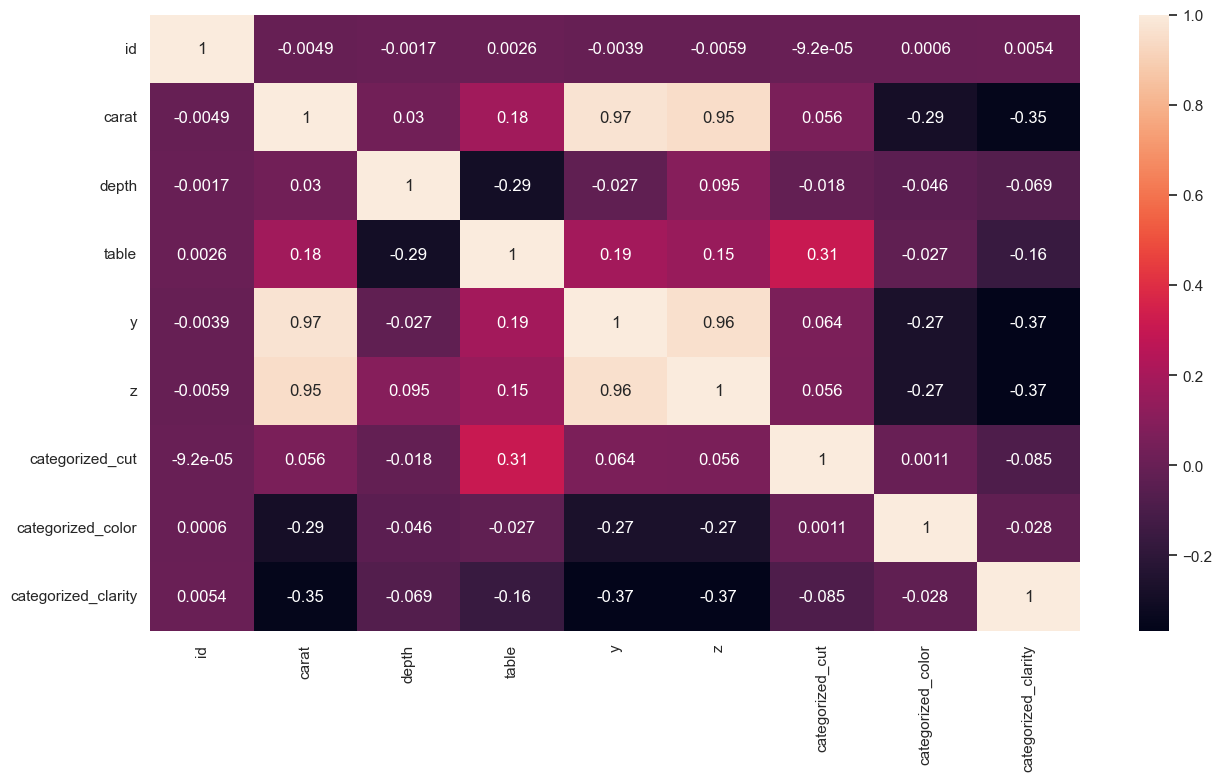

In [39]:
sns.heatmap(X.corr(), annot=True)

In [40]:
y

0        8.928
1        6.477
2        6.810
3        6.824
4        9.776
         ...  
40450    9.149
40451    9.077
40452    8.892
40453    6.385
40454    9.455
Name: price, Length: 40455, dtype: float64

In [56]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say I'm done training")

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.0146578117025273

In [59]:
df_train_modified

,id,depth,table,y,z,price
0,0,63.2,58.0,6.40,4.03,8.928
1,1,61.0,57.0,4.57,2.77,6.477
2,2,60.5,58.0,4.40,2.67,6.810
3,3,61.4,56.0,4.69,2.87,6.824
4,4,61.8,56.0,7.60,4.69,9.776
...,...,...,...,...,...,...
40450,40450,62.2,55.0,6.81,4.23,9.149
40451,40451,64.2,56.0,7.09,4.62,9.077
40452,40452,61.9,55.0,6.58,4.06,8.892
40453,40453,60.1,58.0,4.38,2.64,6.385


In [60]:
df_train_modified = df_train[['id', 'depth', 'table', 'y','z', 'price']]

<Axes: >

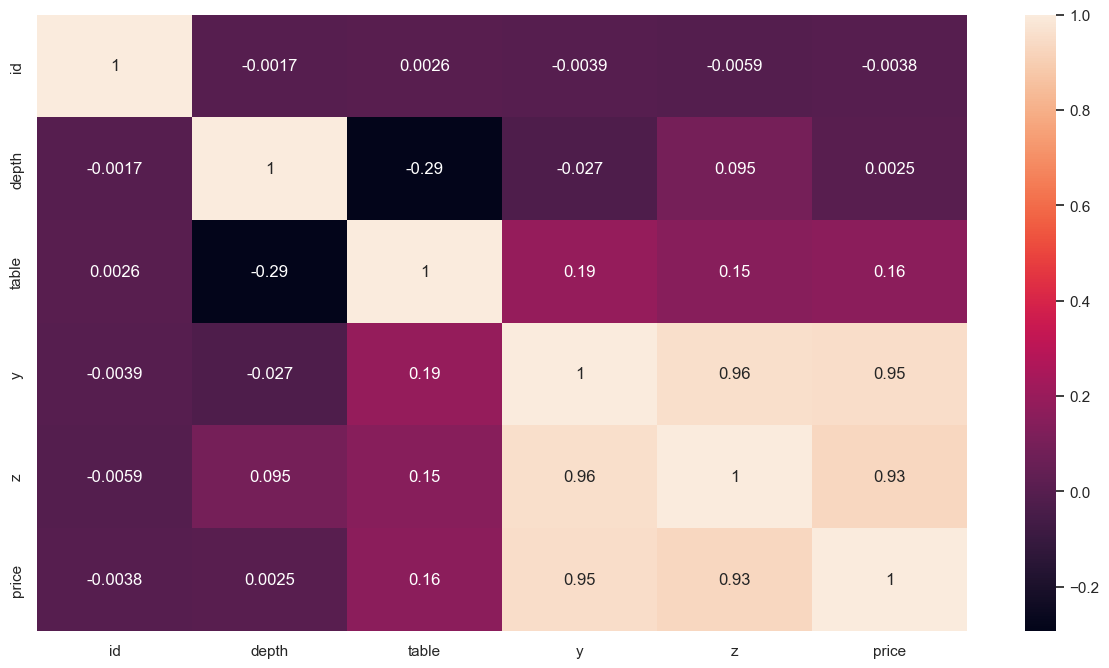

In [61]:
sns.heatmap(df_train_modified.corr(), annot=True)

In [62]:
df_test

,id,carat,cut,color,clarity,depth,table,y,z,categorized_cut,categorized_color,categorized_clarity
0,0,0.81,Ideal,F,SI1,61.5,57.0,6.06,3.71,2,5,3
1,1,0.50,Fair,F,I1,63.8,58.0,4.97,3.21,1,5,1
2,2,0.31,Ideal,D,VVS2,60.1,56.0,4.46,2.67,2,7,6
3,3,1.52,Fair,I,SI2,64.7,58.0,7.22,4.66,1,2,2
4,4,0.35,Premium,D,VVS1,60.8,58.0,4.53,2.76,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,Ideal,D,VVS2,61.4,56.0,5.20,3.20,2,7,6
13481,13481,1.01,Very Good,E,VS2,59.3,59.0,6.56,3.87,5,6,4
13482,13482,1.50,Premium,H,VS2,60.6,61.0,7.31,4.44,3,3,4
13483,13483,0.40,Ideal,E,VVS2,62.5,54.0,4.76,2.97,2,6,6


In [64]:
df_test_modified=df_test
df_test_modified

,id,carat,cut,color,clarity,depth,table,y,z,categorized_cut,categorized_color,categorized_clarity
0,0,0.81,Ideal,F,SI1,61.5,57.0,6.06,3.71,2,5,3
1,1,0.50,Fair,F,I1,63.8,58.0,4.97,3.21,1,5,1
2,2,0.31,Ideal,D,VVS2,60.1,56.0,4.46,2.67,2,7,6
3,3,1.52,Fair,I,SI2,64.7,58.0,7.22,4.66,1,2,2
4,4,0.35,Premium,D,VVS1,60.8,58.0,4.53,2.76,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,Ideal,D,VVS2,61.4,56.0,5.20,3.20,2,7,6
13481,13481,1.01,Very Good,E,VS2,59.3,59.0,6.56,3.87,5,6,4
13482,13482,1.50,Premium,H,VS2,60.6,61.0,7.31,4.44,3,3,4
13483,13483,0.40,Ideal,E,VVS2,62.5,54.0,4.76,2.97,2,6,6


In [65]:
df_test_modified['categorized_cut'] = df_test_modified['cut'].map(cut_dict)
df_test_modified['categorized_color'] = df_test_modified['color'].map(color_dict)
df_test_modified['categorized_clarity'] = df_test_modified['clarity'].map(clarity_dict)

In [66]:
df_test_modified = df_test_modified.select_dtypes(exclude='object')
print(df_test_modified.shape[0])
df_test_modified.sample()

13485


,id,carat,depth,table,y,z,categorized_cut,categorized_color,categorized_clarity
3179,3179,0.5,63.3,56.0,5.03,3.21,4,6,4


In [67]:
y_pred = regressor.predict(df_test_modified)
y_pred

if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

In [68]:
df_test_modified['price'] = y_pred # Adding the predicted price
df_for_submission = df_test_modified[["id", "price"]] # Modifying for subnmission

In [69]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
4562,4562,7.788783


In [70]:
df_for_submission.to_csv("my_submission5.csv", index=False)

if platform == "darwin":
    os.system("say redi for submission")

In [71]:
df_for_submission.head()

,id,price
0,0,7.789987
1,1,7.789978
2,2,7.789756
3,3,7.790166
4,4,7.789784
